In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib
warnings.filterwarnings('ignore')
from sklearn import decomposition, preprocessing, cluster, metrics

## I. Réduction de dimensions et Visualisation des données

### Utils

In [2]:
def visualize(dataset):
    print('--------------------')
    print('Visualisation du PCA')
    print('--------------------')
    print()
    data = pd.read_csv(dataset, sep=';')
    X = data.ix[:, 1:].values
    labels = data.ix[:, 0].values

    # Normalisation
    SS = preprocessing.StandardScaler()
    SS.fit(X)
    X_norm = SS.transform(X)

    # PCA
    pca = decomposition.PCA(n_components=.9)# We set n_components to 90% so that we keep 90% of the initial information
    pca.fit(X_norm)
    X_pca = pca.transform(X_norm)
    
    fig = plt.gcf()
    fig.set_size_inches(16, 8)
    plt.scatter(X_pca[:, 0], X_pca[:, 1])
    for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    plt.show()
    

    print('dimensions initiales :', X_norm.shape)
    print('dimensions transformées :', X_pca.shape)
    
    print()
    print('------------------------')
    print('Interpretation des poids')
    print('------------------------')
    print()
    
    print('poids des deux axes principaux :', pca.explained_variance_[:2])
    weights = pca.components_[:2]

    print('On ne considère que les poids dont la valeur absolue est suppérieure à', 1 / np.sqrt(len(labels)))
    print('Les cellules vertes sont les poids positifs, rouges sont les poids négatifs' +
          ' et gris sont les poids trop bas pour avoir une forte influence :')

    table_data = [['Column', 'x', 'y']]
    table_data.extend([[data.columns[i + 1], w[0], w[1]] for i, w in enumerate(zip(weights[0], weights[1]))])
    table_colours = [['w', 'w', 'w']]
    table_colours.extend([
        ['w', 
         ('palegreen' if w[0] > 0 else 'coral') if np.absolute(w[0]) > 1 / np.sqrt(len(labels)) else 'lightgrey', 
         ('palegreen' if w[1] > 0 else 'coral') if np.absolute(w[1]) > 1 / np.sqrt(len(labels)) else 'lightgrey']
        for w in zip(weights[0], weights[1])])

    t = plt.table(cellText=table_data, cellColours=table_colours, loc='center')
    t.auto_set_font_size(False)
    t.scale(2.5, 2)
    t.set_fontsize(14)
    plt.axis("off")
    plt.show()
    
    return X_pca, labels

### Dataset villes

--------------------
Visualisation du PCA
--------------------



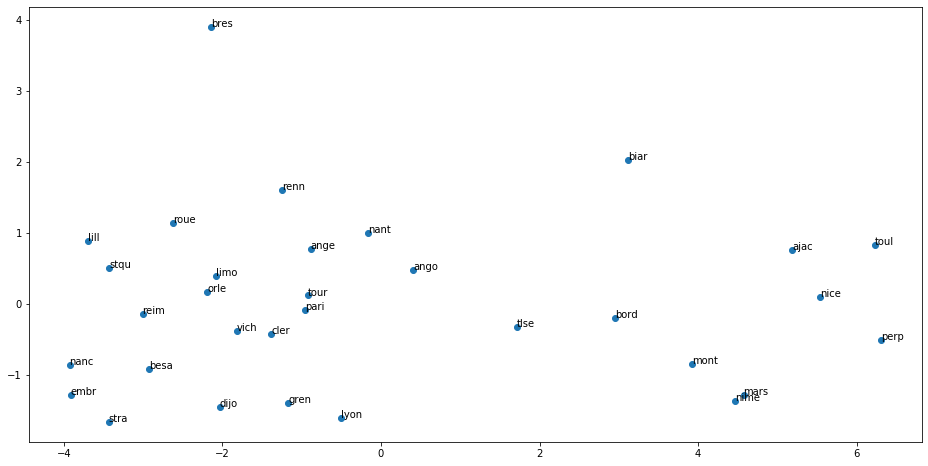

dimensions initiales : (32, 12)
dimensions transformées : (32, 2)

------------------------
Interpretation des poids
------------------------

poids des deux axes principaux : [10.80999558  1.45184229]
On ne considère que les poids dont la valeur absolue est suppérieure à 0.17677669529663687
Les cellules vertes sont les poids positifs, rouges sont les poids négatifs et gris sont les poids trop bas pour avoir une forte influence :


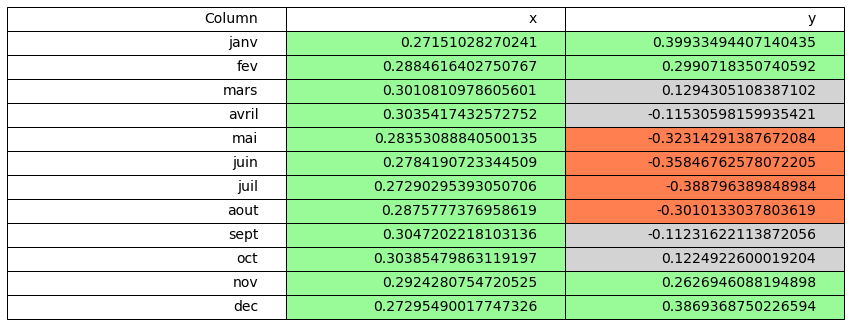

In [3]:
X_pca, labels = visualize('villes.csv')

### Dataset crimes

--------------------
Visualisation du PCA
--------------------



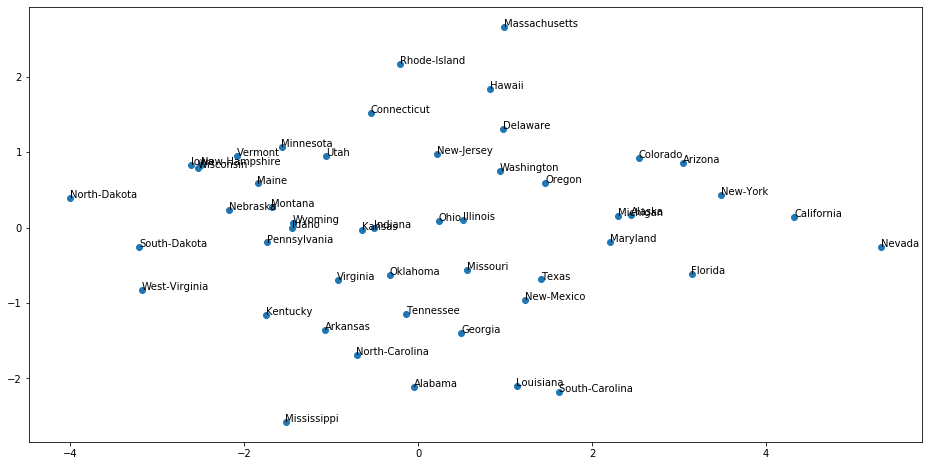

dimensions initiales : (50, 7)
dimensions transformées : (50, 4)

------------------------
Interpretation des poids
------------------------

poids des deux axes principaux : [4.19893828 1.26400187]
On ne considère que les poids dont la valeur absolue est suppérieure à 0.1414213562373095
Les cellules vertes sont les poids positifs, rouges sont les poids négatifs et gris sont les poids trop bas pour avoir une forte influence :


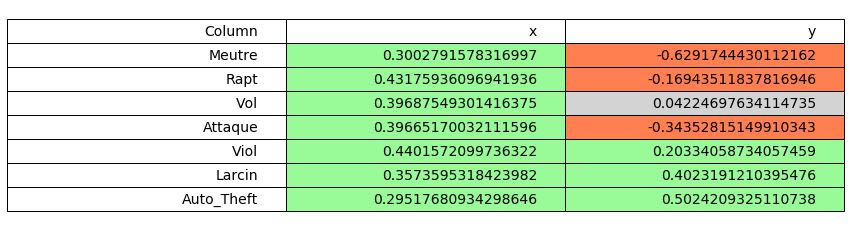

In [4]:
_, _ = visualize('crimes.csv')

### Dataset 50_startups

--------------------
Visualisation du PCA
--------------------



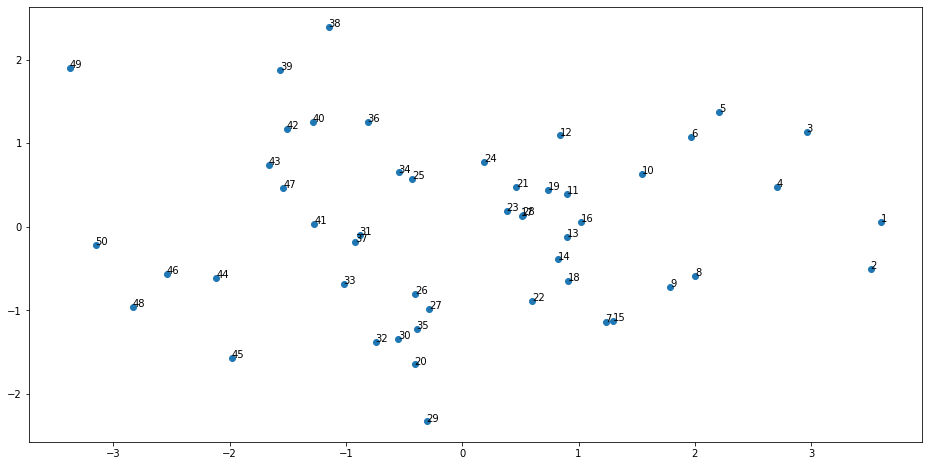

dimensions initiales : (50, 4)
dimensions transformées : (50, 2)

------------------------
Interpretation des poids
------------------------

poids des deux axes principaux : [2.7267099  1.04019163]
On ne considère que les poids dont la valeur absolue est suppérieure à 0.1414213562373095
Les cellules vertes sont les poids positifs, rouges sont les poids négatifs et gris sont les poids trop bas pour avoir une forte influence :


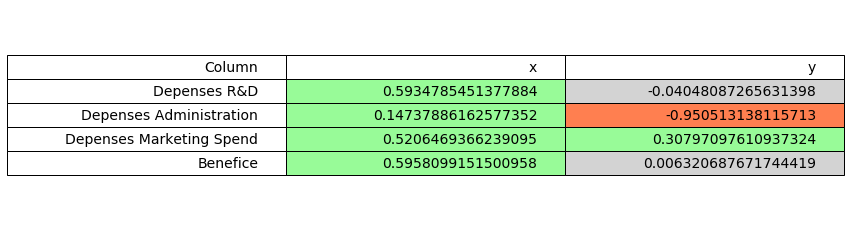

In [5]:
_, _ = visualize('50_startups.csv')

## II. Clustering

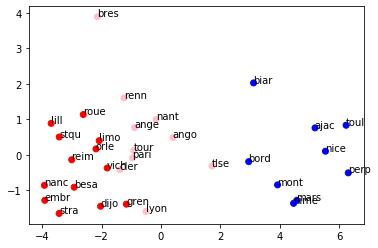

In [6]:
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_pca)
clustering = k_means.labels_

colors = ['red', 'yellow', 'blue', 'pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

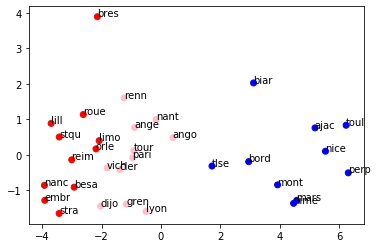

In [7]:
agglo = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo.fit(X_pca)
clustering = agglo.labels_

colors = ['red', 'yellow', 'blue', 'pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

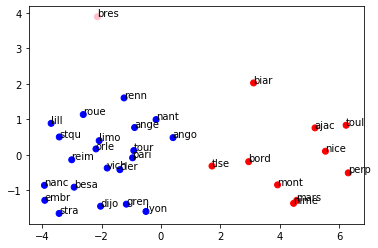

In [8]:
agglo = cluster.AgglomerativeClustering(n_clusters=3, linkage='average')
agglo.fit(X_pca)
clustering = agglo.labels_

colors = ['red', 'yellow', 'blue', 'pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

Indice silhouette max de kmeans : 0.6341345030494504 , pour 2 clusters :


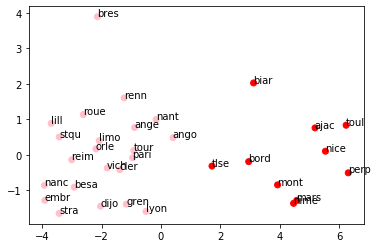

In [9]:
max_c = 0
max_v = 0
for i in np.arange(2, 6):
    clustering = cluster.KMeans(n_clusters=i).fit_predict(X_pca)
    v = metrics.silhouette_score(X_pca, clustering,metric='euclidean')
    if v > max_v:
        max_c = i
        max_v = v
print('Indice silhouette max de kmeans :', max_v, ', pour', max_c, 'clusters :')
k_means = cluster.KMeans(n_clusters=max_c)
k_means.fit(X_pca)
clustering = k_means.labels_
colors = ['red', 'yellow', 'blue', 'pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()